In [8]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


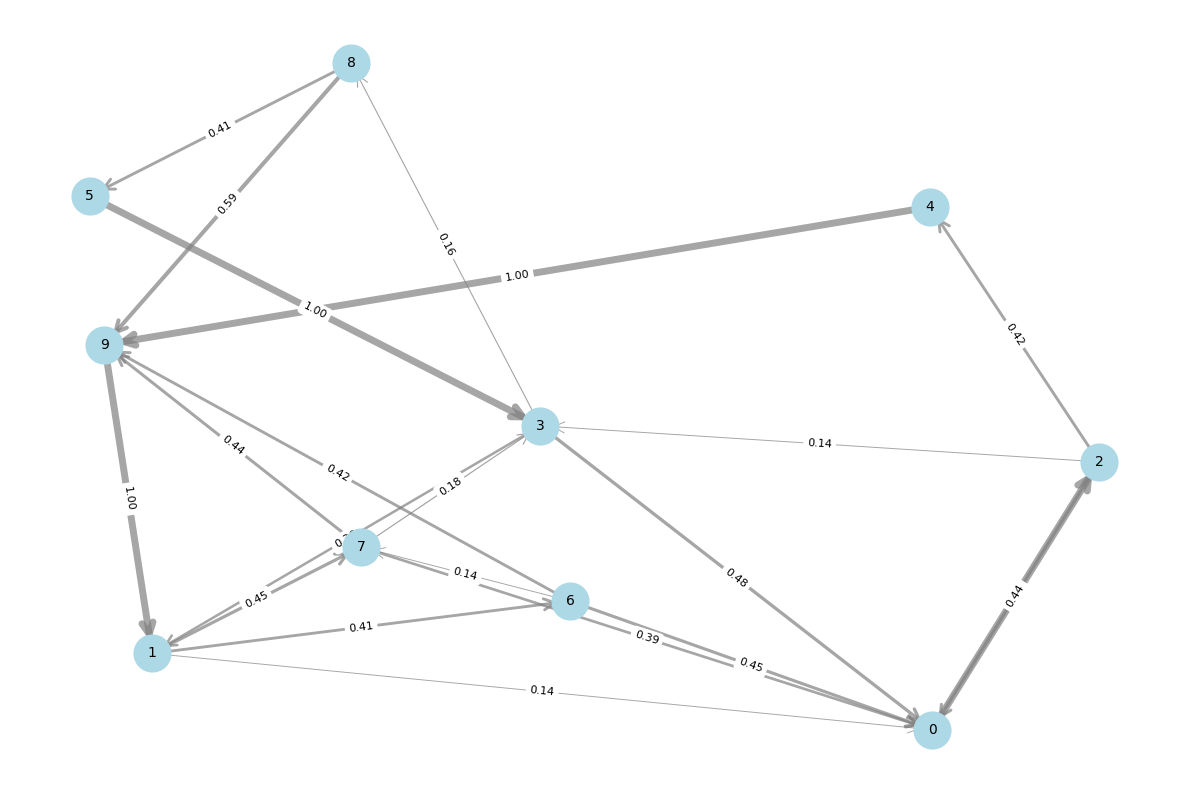

In [2]:
from graphverse.graph.graph_generation import (
    calculate_edge_density,
    generate_random_graph,
    load_graph,
    save_graph,
)
from graphverse.vis.graph_draw_nx import visualize_graph

G = load_graph("my_graph.gml")
visualize_graph(G)

In [3]:
from graphverse.graph.rules import instantiate_all_rules

In [17]:
import math
import random

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import torch

from graphverse.data.preparation import prepare_training_data
from graphverse.graph.graph_generation import (
    calculate_edge_density,
    generate_random_graph,
)
from graphverse.graph.rules import (
    AscenderRule,
    DescenderRule,
    EvenRule,
    OddRule,
    RepeaterRule,
    define_all_rules,
    instantiate_all_rules
)
from graphverse.llm.evaluation import evaluate_model
from graphverse.llm.training import train_model

from graphverse.graph.walk import generate_multiple_walks




n = 10
num_walks = 100
min_walk_length = 5
max_walk_length = 20
num_repeaters = 3
repeater_min_steps = 3
repeater_max_steps = 10
epochs = 10
batch_size = 32
learning_rate = 0.001
verbose = True




if verbose:
    print("Selecting vertices with rules")
# ascenders, descenders, evens, odds, repeaters = define_all_rules(
#     n, num_repeaters, repeater_min_steps, repeater_max_steps
# )
# rules = (ascenders, descenders, evens, odds, repeaters)

rules = instantiate_all_rules(n, num_repeaters, repeater_min_steps, repeater_max_steps)

# Generate graph
if verbose:
    print("Generating graph")
G = generate_random_graph(
    n, rules, verbose=verbose
)

if verbose:
    print(f"Graph created")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Is strongly connected: {nx.is_strongly_connected(G)}")
    print(f"Is weakly connected: {nx.is_weakly_connected(G)}")
    print(f"Now preparing training data")

# Prepare training data
walks = generate_multiple_walks(
    G, num_walks, min_walk_length, max_walk_length, rules, verbose=verbose
)
# training_data, vocab = prepare_training_data(G, walks, rules, verbose=verbose)
training_data, vocab = prepare_training_data(
    G, num_walks, min_walk_length, max_walk_length, rules, verbose=False
)
if verbose:
    print(f"Training data prepared")

# Train model
if verbose:
    print(f"Training model")
model = train_model(
    training_data, vocab, epochs, batch_size, learning_rate, verbose=verbose
)
if verbose:
    print(f"Model trained")

Selecting vertices with rules
Generating graph
Generating random graph...
Creating an empty directed graph...
Adding 10 nodes...
Assigning rule designations to vertices...
Building the graph by adding edges that satisfy the rules...
Processing node 0...
Processing node 1...
Processing node 2...
Processing node 3...
Processing node 4...
Processing node 5...
Processing node 6...
Processing node 7...
Processing node 8...
Processing node 9...
Assigning random probability distributions to outgoing edges...
Processing node 0...
Processing node 1...
Processing node 2...
Processing node 3...
Processing node 4...
Processing node 5...
Processing node 6...
Processing node 7...
Processing node 8...
Processing node 9...
Random graph generated successfully.
Graph created
Number of nodes: 10
Number of edges: 21
Is strongly connected: False
Is weakly connected: True
Now preparing training data
Generating 100 walks...
Attempts: 0/10, Walks generated: 0/100, Total attempts: 0
Generating valid walk start

In [18]:
rules

(set(), set(), {0}, {7}, {6: 4, 8: 9, 1: 3})